In [1]:
# Importing required libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey = pd.read_excel(r"C:\Users\LENOVO\OneDrive\Desktop\Sample Survey.xlsx",sheet_name= "Data")

In [3]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [ ]:
survey.info()



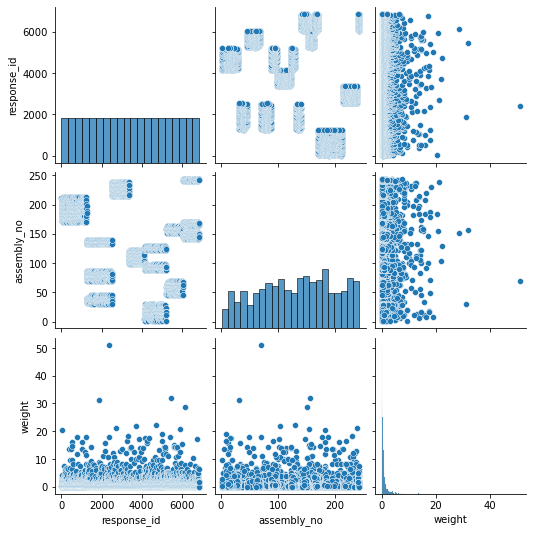

In [5]:
## Let plot the survey to check the data spreeded and need to for followin steps
sns.pairplot(survey)



2. How many samples were collected on each day?

In [6]:
# lets make dataframe of columns id and collections date for each day.
#So lets apply some filters 
df=survey[["response_id","collection_date"]]

In [7]:
df

,response_id,collection_date
0,1,2020-08-24
1,2,2020-08-24
2,3,2020-08-24
3,4,2020-08-24
4,5,2020-08-24
...,...,...
6862,6863,2020-09-01
6863,6864,2020-09-01
6864,6865,2020-09-01
6865,6866,2020-09-01


In [8]:
df["year"]=df["collection_date"].dt.year
df["month"]=df["collection_date"].dt.month
df["day"]=df["collection_date"].dt.day
df



,response_id,collection_date,year,month,day
0,1,2020-08-24,2020,8,24
1,2,2020-08-24,2020,8,24
2,3,2020-08-24,2020,8,24
3,4,2020-08-24,2020,8,24
4,5,2020-08-24,2020,8,24
...,...,...,...,...,...
6862,6863,2020-09-01,2020,9,1
6863,6864,2020-09-01,2020,9,1
6864,6865,2020-09-01,2020,9,1
6865,6866,2020-09-01,2020,9,1


(array([1479.,  998.,  598.,  665.,    0.,  761.,  620.,  582.,  557.,
         607.]),
 array([18498. , 18498.8, 18499.6, 18500.4, 18501.2, 18502. , 18502.8,
        18503.6, 18504.4, 18505.2, 18506. ]),
 <BarContainer object of 10 artists>)

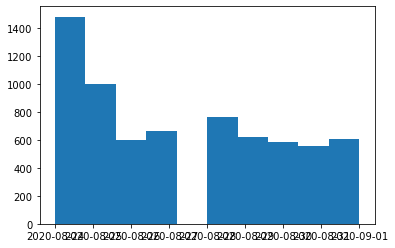

In [9]:
df1=df["collection_date"]
plt.hist(df1)




In [10]:
survey['collection_date'].value_counts()





2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

3. What proportion of the total respondents were aged less than 45?

In [11]:


## Task-3
# Proportions of total responded were aged less than 45??


proportion = len(survey[survey['age'] < 45]) / len(survey)

proportion    ## So the responded were of aged is 93% onthe less than 45.  



TypeError: '<' not supported between instances of 'str' and 'int'

4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The
dataframe should look like this after the column creation:

In [ ]:
## We can make dictionary function
## or 
# #We need to creat dataframe with new column of age_group and bin it.
## Lets apply binning functon to make the new dataframe column.

In [ ]:
ml1=list(range(18,26))
mydict1=dict.fromkeys(ml1,'18-25')
ml2=list(range(25,41))
mydict2=dict.fromkeys(ml2,'25-40')
ml3=list(range(40,56))
mydict3=dict.fromkeys(ml3,'40-55')
ml4=list(range(56,100))
mydict4=dict.fromkeys(ml4,'55+')
mydict1.update(mydict2)
mydict1.update(mydict3)
mydict1.update(mydict4)
survey['age_group']=survey['age'].map(mydict1)
survey.head()



In [ ]:
New_df = pd.DataFrame([18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,99], columns=['age'])
bins= [18,25,40,50,60,70,80,100]
labels = ['18-25', '25-40', '40-55', '55-65','65-70','70-99','100+']
New_df['age_group'] = pd.cut(New_df.age, bins, labels = labels,include_lowest = True)
print(New_df)

5.How many samples were collected for each age-group? Which age-group had the most
samples?

In [ ]:
sns.countplot(x="age",hue="age_group",data = New_df)
plt.show()



In [ ]:
#From the above plot we say that age_group of "25-40" that is "Orange Color" 
# has high range of ages.
# And when apply value counts fuction we will get like below one 

New_df['age_group'].value_counts() ## 25-40 age_group



6.What proportion of the respondents had opted for the RJD party in both the Vote_Now
and the Past_Vote questions?

In [ ]:
## We need to used logical operators
proportion=len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey)

# We need to calculate the percentage of responded for RJD in the both times.

print('There are {}% RJD in both the elections vote_now and past_vote'.format(proportion*100))

7. For each day of sample collection, determine the proportion of respondents who were
fully satisfied with the performance of the CM. So if there were a total of 1000 samples
on day 1 and 300 out of those said they were fully satisfied, then our answer for that day
would be 0.3.

In [ ]:
survey.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

8. In a similar fashion create a day-wise proportion of respondents that opted fully
dissatisfied with their MLA. Create a line plot of the result with date on x-axis and
proportions on the y-axis.

In [ ]:
## Similar steps for the dis-satisfaction with the MLA and line plot
## we need to import datetime library for line plot....

In [ ]:
Dis_table = pd.DataFrame(survey.groupby(by='collection_date')[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100))

print(Dis_table)

import datetime
Dis_table.index.date
Dis_table.plot()

9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and
cell values as the count of samples.

In [ ]:
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='count',values='response_id')

10. Repeat the above question with the cell values as the sum of “weight”.

In [ ]:
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='sum',values='weight')

11. Create a dataframe by performing a group by over age_group and calculate the count of
total samples under each age_group.

In [ ]:
df4=pd.DataFrame(survey.groupby(by="age_group")["response_id"].agg("count"))
print(df4)

12. Create a dataframe by performing a group by over age_group and finding the count of
total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [ ]:
df5=pd.DataFrame(survey.groupby(by="age_group")["Vote_Now"].apply(lambda x:np.sum(x=="JD(U)")))
print(df5)

13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [ ]:
df_inner = pd.merge(df4, df5, on='age_group', how='inner')
df_inner

In [ ]:
survey.head()

In [ ]:
survey.split(income)